# Introduction to Regression with Neural Network in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating some data to view and fit

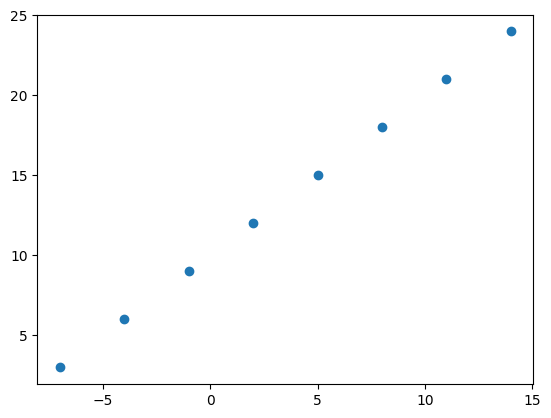

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedrrom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrrom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
# Turn our numpy array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

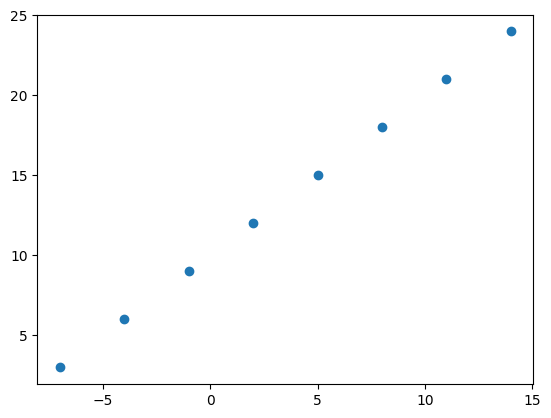

In [9]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compilling a model** - define the loss function (in other words, the function which tells our model ho wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 798ms/step - loss: 8.8414 - mae: 8.8414
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 8.7089 - mae: 8.7089
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 8.5764 - mae: 8.5764
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 8.4439 - mae: 8.4439
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 8.3114 - mae: 8.3114


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 140ms/step


array([[25.652246]], dtype=float32)

In [13]:
y_pred + 17

array([[42.652245]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compilling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training longer) or on more data (give the mode more examples to learn from).

In [14]:
# Let's rebuild our model

# 1. Create our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 497ms/step - loss: 7.6661 - mae: 7.6661
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5336 - mae: 7.5336
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4738 - mae: 7.4738
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4681 - mae: 7.4681
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4625 - mae: 7.4625
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4569 - mae: 7.4569
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4513 - mae: 7.4513
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4456 - mae: 7.4456
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - l

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[30.281034]], dtype=float32)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 641ms/step - loss: 14.0213 - mae: 14.0213
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.9382 - mae: 13.9382
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8551 - mae: 13.8551
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.7720 - mae: 13.7720
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.6890 - mae: 13.6890
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.6059 - mae: 13.6059
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5228 - mae: 13.5228
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4397 - mae: 13.4397
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3566 - mae: 13.3566
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2735 - mae: 13.2735
Epoch 11/100
1/1 [==============================

In [18]:
model.predict([17.])

1/1 [==============================] - 0s 77ms/step


array([[31.456554]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building a neural networks is:

```Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model```

When it comes to evaluation... there are 3 words u should memorize:

>"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it looks like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [19]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

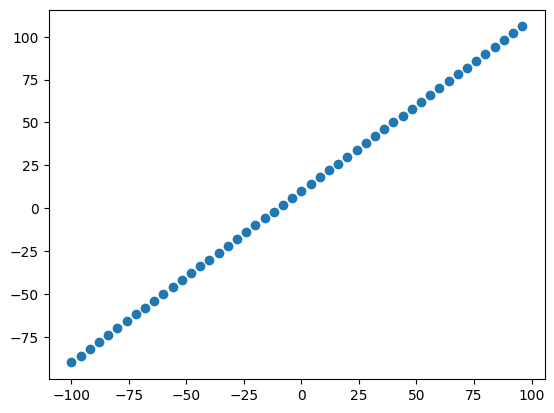

In [21]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data you have available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [22]:
# Check the length of how many samples we have
len(X)

50

In [23]:
# Split the data into train and test sets
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

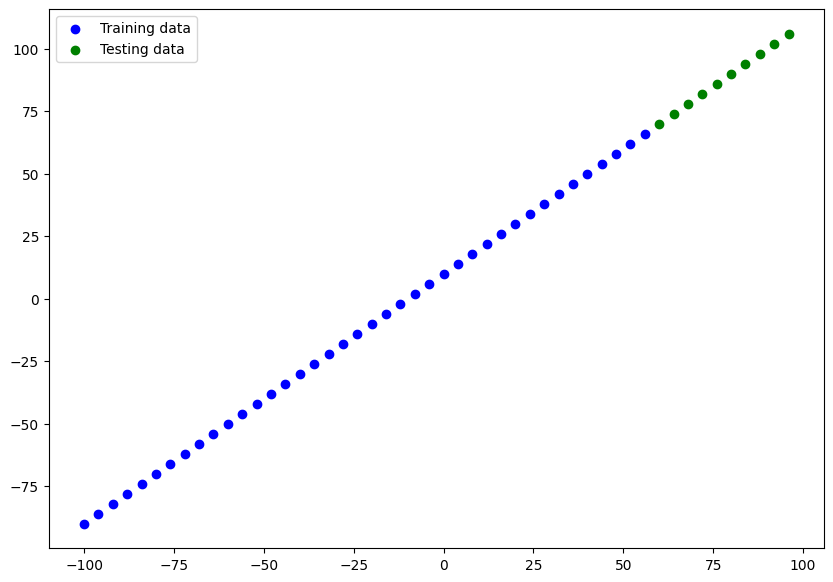

In [24]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot the testing data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show a legend
plt.legend();

In [25]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", metrics=["mae"], optimizer=tf.keras.optimizers.SGD())

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [26]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss="mae", metrics=["mae"], optimizer=tf.keras.optimizers.SGD())

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parmeters from other models during **transfer learning**).

In [28]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [29]:
# get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


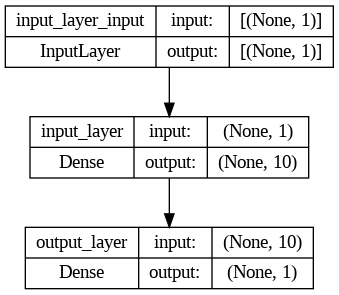

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (groudn truth versus your model's predictions).

In [31]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 80ms/step


array([[ 88.58581 ],
       [ 94.366486],
       [100.147156],
       [105.92783 ],
       [111.708496],
       [117.489174],
       [123.26985 ],
       [129.05052 ],
       [134.8312  ],
       [140.61188 ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** if you feel like you're gonna resuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [33]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

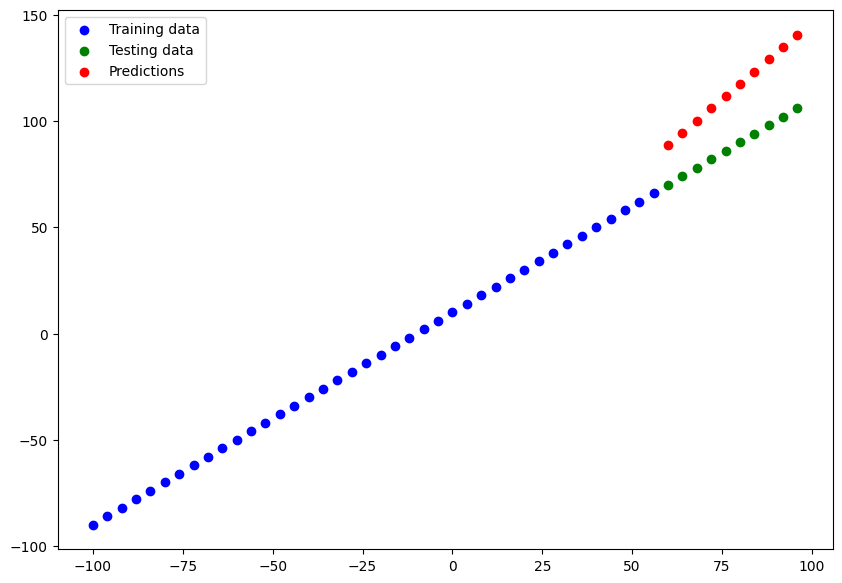

In [34]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [35]:
# Evaluate the mdoel on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 237ms/step - loss: 26.5988 - mae: 26.5988


[26.598840713500977, 26.598840713500977]

In [36]:
# Calculate the mean absolute error
mae = tf.keras.losses.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.      , 10.946594, 13.688293, 17.942266, 23.708496, 29.489172,
       35.26985 , 41.05052 , 46.831207, 52.611877], dtype=float32)>

In [37]:
y_pred

array([[ 88.58581 ],
       [ 94.366486],
       [100.147156],
       [105.92783 ],
       [111.708496],
       [117.489174],
       [123.26985 ],
       [129.05052 ],
       [134.8312  ],
       [140.61188 ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 88.58581 ,  94.366486, 100.147156, 105.92783 , 111.708496,
       117.489174, 123.26985 , 129.05052 , 134.8312  , 140.61188 ],
      dtype=float32)>

In [40]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=26.59884>

In [41]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=733.6574>

In [42]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model
```

1. Get more data - get more examples for your model to train on (more oppportunities to learn latterns or relationships bwtween features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [43]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 60.6724 - mae: 60.6724
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 25.8939 - mae: 25.8939
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 10.6577 - mae: 10.6577
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.2158 - mae: 13.2158
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.2898 - mae: 12.2898
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5097 - mae: 9.5097
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6388 - mae: 8.6388
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0642 - mae: 9.0642
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.8949 - mae: 18.8949
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.2046 - mae: 10.2046
Epoch 11/100
2/2 [==============================] - 0s 9ms/ste

1/1 [==============================] - 0s 70ms/step


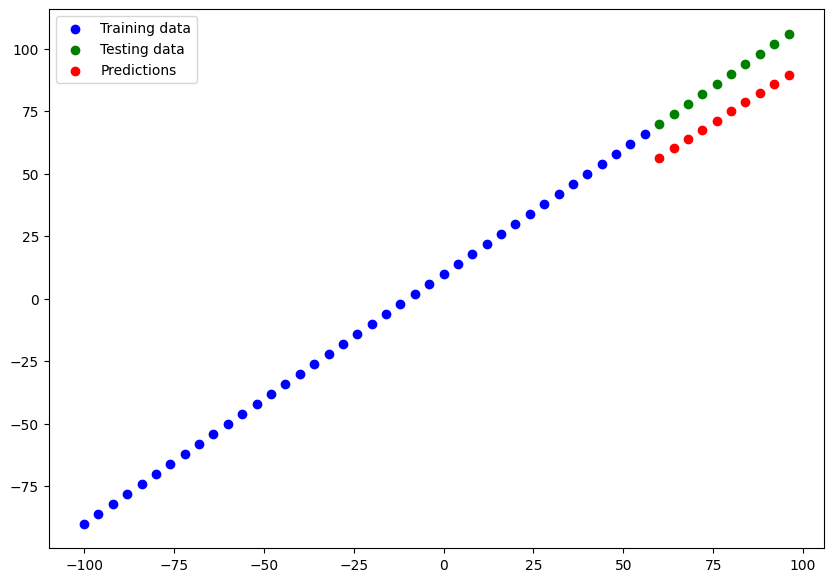

In [44]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [45]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.92602>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.62166>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [46]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
])

# 2. Compile the mdoel
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 69.2591 - mse: 7302.1289
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 22.7087 - mse: 808.7397
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 17.7060 - mse: 454.1761
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.8168 - mse: 287.8560
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 17.4678 - mse: 410.3217
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2171 - mse: 120.0456
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1878 - mse: 151.5426
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1176 - mse: 159.8477
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.5774 - mse: 2598.9536
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 27.9559 - mse: 1101.4246
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 67ms/step


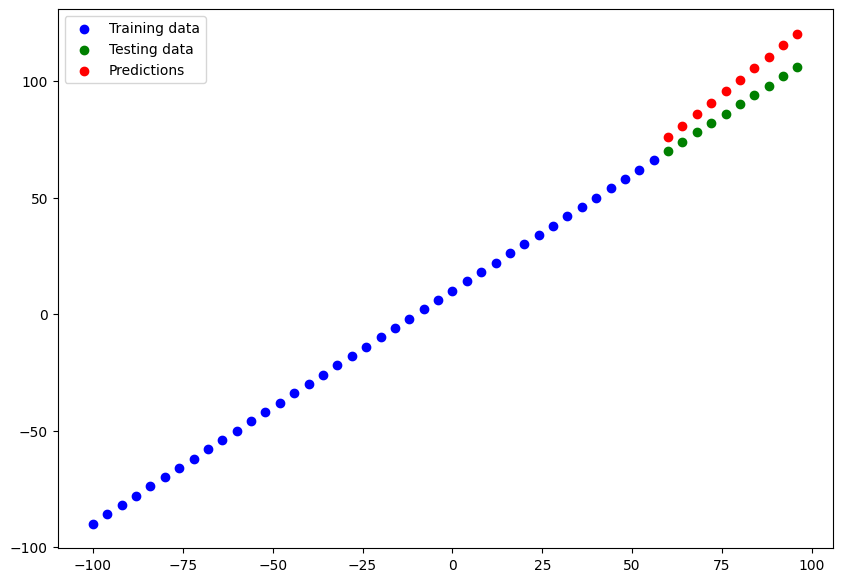

In [47]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [48]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.070025>,
 <tf.Tensor: shape=(), dtype=float32, numpy=108.693375>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [49]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 53.2462 - mae: 53.2462
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 29.2604 - mae: 29.2604
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 34.3633 - mae: 34.3633
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4231 - mae: 27.4231
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9605 - mae: 14.9605
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.9033 - mae: 11.9033
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2363 - mae: 11.2363
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 11.1267 - mae: 11.1267
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.8143 - mae: 40.8143
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 28.1636 - mae: 28.1636
Epoch 11/500
2/2 [==============================] - 0s 6m

1/1 [==============================] - 0s 82ms/step


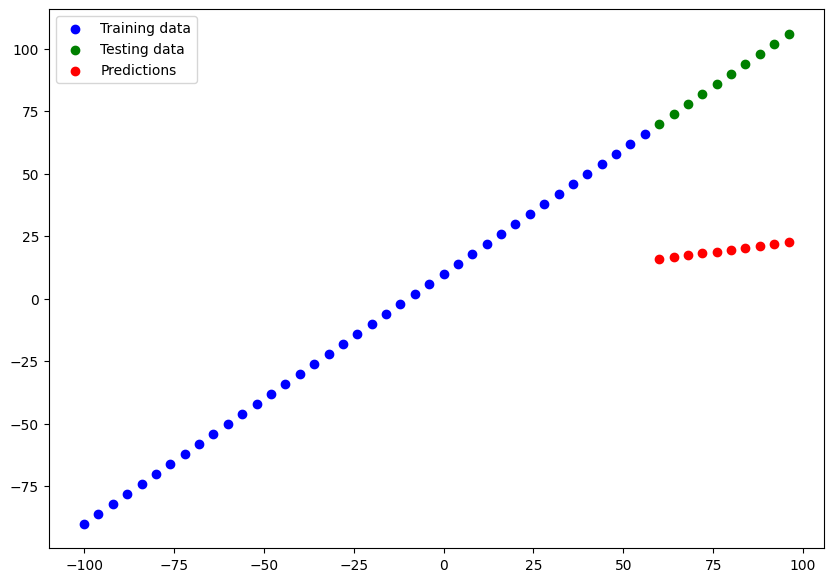

In [50]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [51]:
# Calculate model_3 evalutation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71196>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4807.7646>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scales.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [52]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.926020,223.621658
1,model_2,10.070025,108.693375
2,model_3,68.711960,4807.764648


Looks like `model_2` performed the best...

In [53]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goal should be to minimize the time between your experiments.he more experimentsyou do, the more thing you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning motto: "experiment, experiment, experiment".

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a eb application or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [54]:
# Save model using the SavedModel format
model_2.save("best_model_SvaedModel_format")

In [55]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model


In [56]:
# Load in the SaveModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SvaedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compare model_2 predictions with SaveModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 57ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [58]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 67ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [60]:
# Compare the MAE of model_2_preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## A larger example

In [61]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [64]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [65]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [66]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [67]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [68]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [71]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8566.2549 - mae: 8566.2549
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7883.7402 - mae: 7883.7402
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7585.2495 - mae: 7585.2495
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7821.8618 - mae: 7821.8618
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7681.2500 - mae: 7681.2500
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7610.0947 - mae: 7610.0947
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7582.1636 - mae: 7582.1636
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7755.3965 - mae: 7755.3965
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7579.2476 - mae: 7579.2476
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7725.2773 - mae: 7725.2773

In [72]:
# Check the result of the insurance model in the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7234.7524 - mae: 7234.7524


[7234.75244140625, 7234.75244140625]

In [76]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer
3. (insert your own experiment here)

In [84]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13264.7500 - mae: 13264.7500
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13045.5430 - mae: 13045.5430
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12606.6699 - mae: 12606.6699
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11783.0508 - mae: 11783.0508
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10497.8447 - mae: 10497.8447
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9011.2549 - mae: 9011.2549
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7846.2534 - mae: 7846.2534
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7461.7700 - mae: 7461.7700
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.9160 - mae: 7409.9160
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7390.6719 - mae:

In [85]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4703.7705 - mae: 4703.7705


[4703.7705078125, 4703.7705078125]

In [87]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7234.7524 - mae: 7234.7524


[7234.75244140625, 7234.75244140625]

In [89]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13308.9521 - mae: 13308.9521
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13160.5068 - mae: 13160.5068
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12844.3359 - mae: 12844.3359
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12208.3516 - mae: 12208.3516
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11115.6680 - mae: 11115.6680
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9668.9883 - mae: 9668.9883
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8290.9199 - mae: 8290.9199
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7569.3433 - mae: 7569.3433
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7435.7563 - mae: 7435.7563
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7414.9536 - mae:

In [90]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3502.3210 - mae: 3502.3210


[3502.321044921875, 3502.321044921875]

In [91]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7234.7524 - mae: 7234.7524


[7234.75244140625, 7234.75244140625]

Text(0.5, 0, 'epochs')

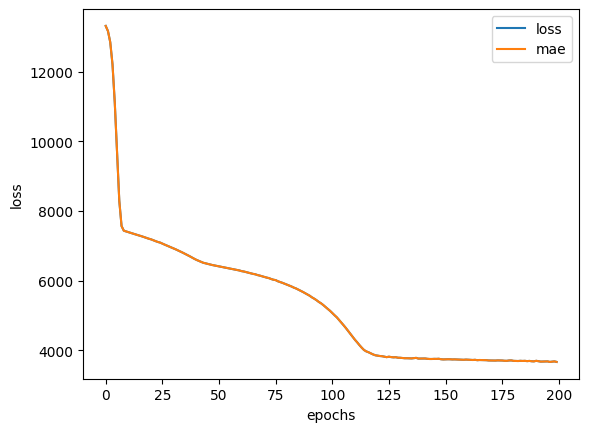

In [92]:
# Plot history also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In term of scaling values, neural netorks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [101]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data ith normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [102]:
# hat does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [104]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [105]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [107]:
# Build a neural network model to fit  on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.3066 - mae: 13343.3066
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.2900 - mae: 13333.2900
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13308.5557 - mae: 13308.5557
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13258.0742 - mae: 13258.0742
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13170.8193 - mae: 13170.8193
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13036.0234 - mae: 13036.0234
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12843.7119 - mae: 12843.7119
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12584.0000 - mae: 12584.0000
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12246.8711 - mae: 12246.8711
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11831.03

In [108]:
# Evaluate our insuarance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3435.2598 - mae: 3435.2598


[3435.259765625, 3435.259765625]

In [ ]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 4703.7705 - mae: 4703.7705